In [1]:
print("hello world")

hello world


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("../datasets/magic04.data", names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


converting class col into binary representation

g= gamma and h = hadron

In [4]:
df["class"] = df["class"].map({"g": 0, "h": 1})
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,0
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,0
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,0
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,0
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,0


In [5]:
df["class"].value_counts()

class
0    12332
1     6688
Name: count, dtype: int64

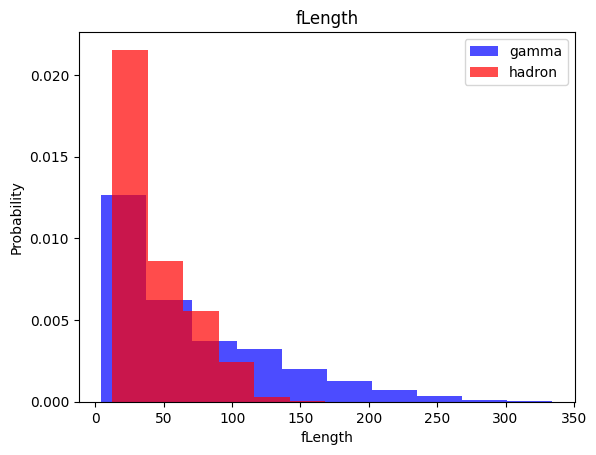

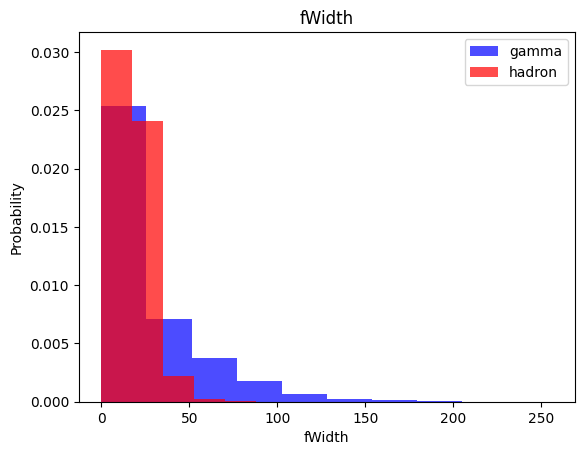

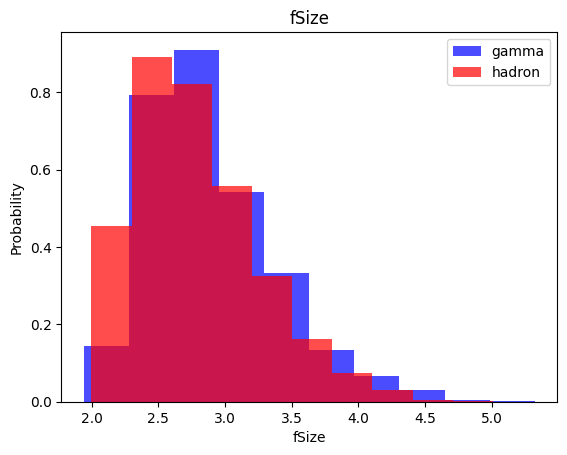

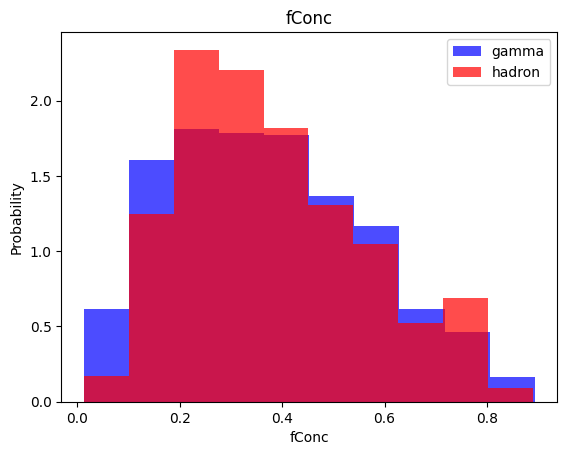

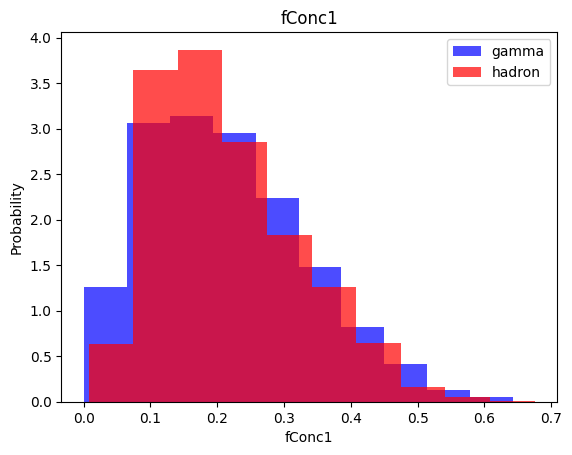

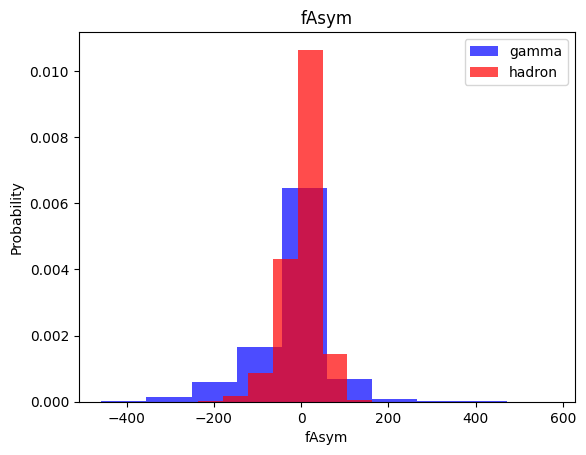

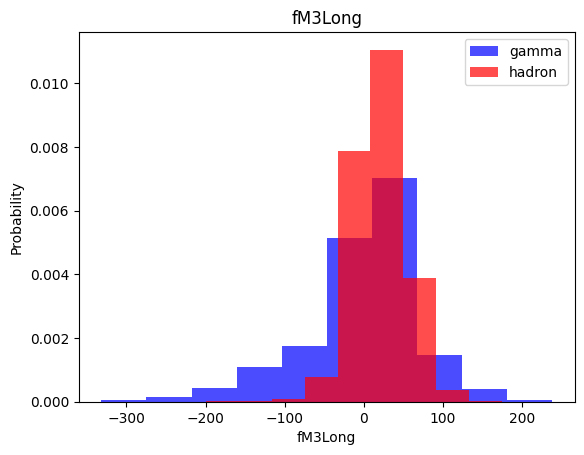

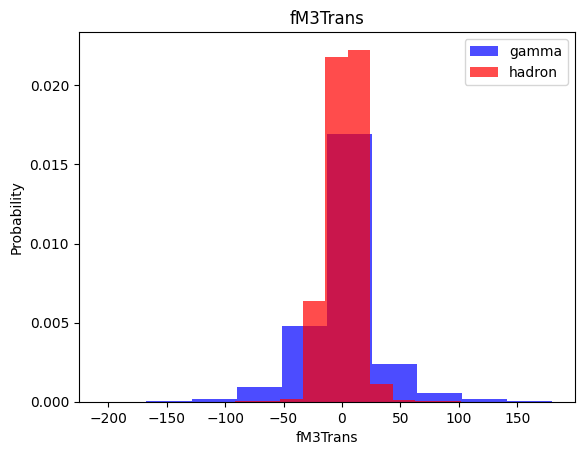

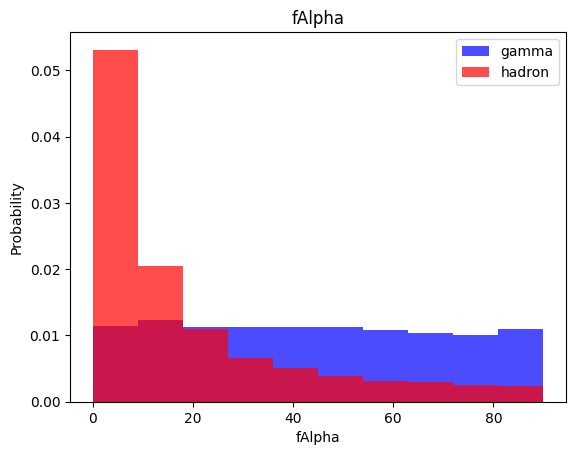

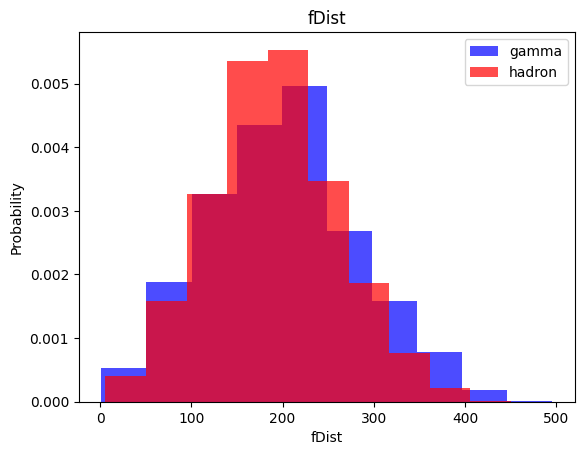

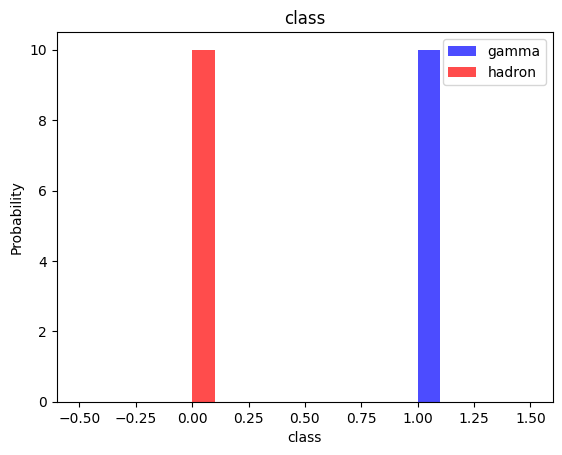

In [6]:
for labels in cols:
    plt.hist(df[df["class"]==1][labels],color="blue",label = "gamma",alpha = .7,density = True)
    plt.hist(df[df["class"]==0][labels],color="red",label = "hadron",alpha = .7,density = True)
    plt.title(labels)
    plt.xlabel(labels)
    plt.ylabel("Probability")
    plt.legend()
    plt.show()

### training, validation and testing datasets

In [7]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [8]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])


c:\Users\Danish\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [9]:
def scale_dataset(dataframe, oversample=False):
  # separate features and labels from training dataset
  # x = independent features
  # y = dependent features
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [10]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

### 1. KNN

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [10]:
# training the model 
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [11]:
y_pred = knn_model.predict(X_test)

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      2516
           1       0.73      0.72      0.73      1288

    accuracy                           0.82      3804
   macro avg       0.80      0.79      0.79      3804
weighted avg       0.82      0.82      0.82      3804



In [13]:
conf_mat = confusion_matrix(y_test, y_pred)
class_labels = np.unique(y_test)
print("Confusion Matrix:")
print(pd.DataFrame(conf_mat, index=class_labels, columns=class_labels))

Confusion Matrix:
      0    1
0  2174  342
1   356  932


### Naive Bayes classification

In [14]:
from sklearn.naive_bayes import GaussianNB


In [15]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [16]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.89      0.81      2516
           1       0.65      0.40      0.49      1288

    accuracy                           0.72      3804
   macro avg       0.70      0.64      0.65      3804
weighted avg       0.71      0.72      0.70      3804



In [17]:
conf_mat = confusion_matrix(y_test, y_pred)
class_labels = np.unique(y_test)
print("Confusion Matrix:")
print(pd.DataFrame(conf_mat, index=class_labels, columns=class_labels))

Confusion Matrix:
      0    1
0  2244  272
1   777  511


### Logistic regression

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [20]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      2516
           1       0.66      0.72      0.69      1288

    accuracy                           0.78      3804
   macro avg       0.75      0.77      0.76      3804
weighted avg       0.78      0.78      0.78      3804



In [21]:
conf_mat = confusion_matrix(y_test, y_pred)
class_labels = np.unique(y_test)
print("Confusion Matrix:")
print(pd.DataFrame(conf_mat, index=class_labels, columns=class_labels))

Confusion Matrix:
      0    1
0  2027  489
1   355  933


### SVM

In [17]:
from sklearn.svm import SVC

In [20]:
from sklearn.metrics import classification_report,confusion_matrix

In [18]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [21]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89      2460
           1       0.81      0.80      0.80      1344

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



In [22]:
conf_mat = confusion_matrix(y_test, y_pred)
class_labels = np.unique(y_test)
print("Confusion Matrix:")
print(pd.DataFrame(conf_mat, index=class_labels, columns=class_labels))

Confusion Matrix:
      0     1
0  2209   251
1   273  1071
